In [89]:
# import bibliotek, ładowanie danych
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

california_housing = fetch_california_housing(as_frame=True)

# Wstępna eksploracja danych:

In [90]:
# 1.1 Jakie są features
print(f"Features:{california_housing.feature_names}")


Features:['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


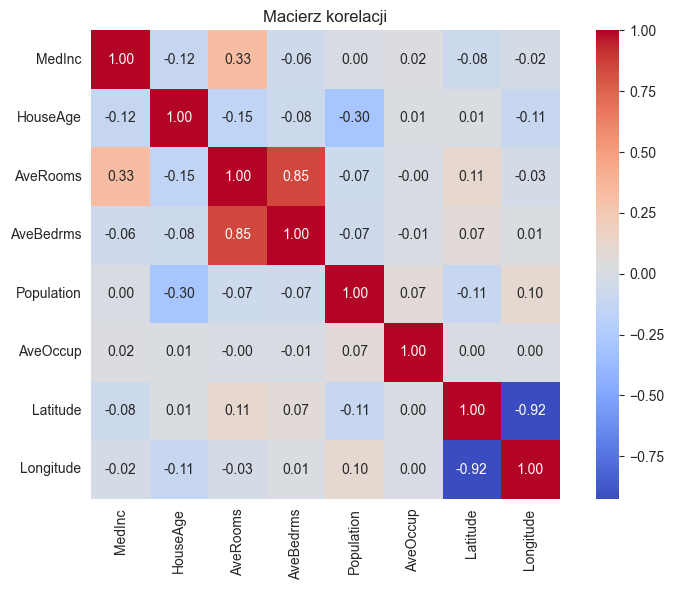

In [93]:
# 1.2 Czy są korelacje
print(california_housing.frame.head())

corr_matrix = california_housing.data.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Macierz korelacji")
plt.tight_layout()
plt.show()

# Zbuduj model korelacji liniowej

In [82]:
# 2.1 Podział danych
X = california_housing.data
y = california_housing.target
dfX = pd.DataFrame(X)
dfy = pd.DataFrame(y)

print(dfX.head())
print(dfy.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
   MedHouseVal
0        4.526
1        3.585
2        3.521
3        3.413
4        3.422


In [83]:
# 2.2 Naucz model
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [84]:
# 2.3 Wyświetl współczynniki

print(f"Coef: {model.coef_}")

Coef: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]


# Ocen jakość modelu:

In [87]:
# MSE
print("MSE:", mean_squared_error(y_test, y_pred))
# R2
print("R2:", r2_score(y_test, y_pred))


MSE: 0.555891598695244
R2: 0.5757877060324511


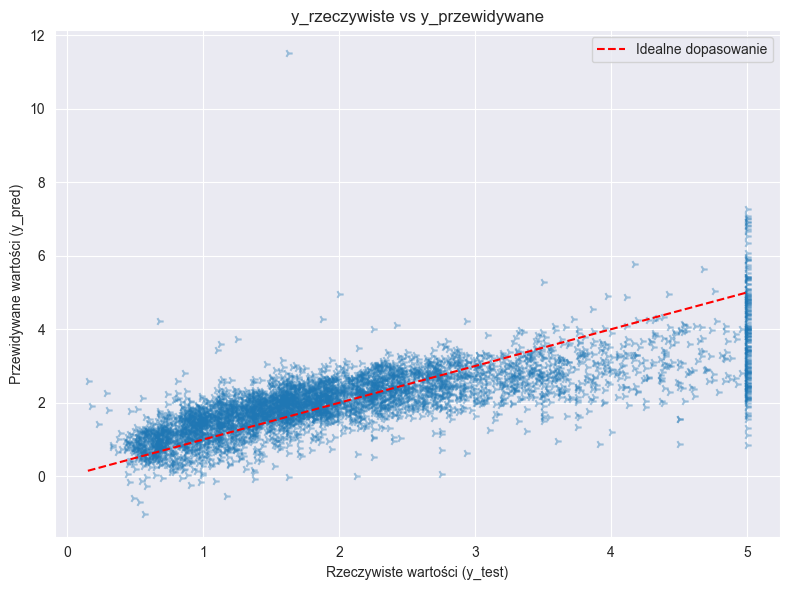

In [96]:
# Wykres y_rzeczywiste vs y_przewidywane
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.4, marker='4' )
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", label="Idealne dopasowanie")
plt.xlabel("Rzeczywiste wartości (y_test)")
plt.ylabel("Przewidywane wartości (y_pred)")
plt.title("y_rzeczywiste vs y_przewidywane")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()